In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"depression_anxiety_data.csv")

In [3]:
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [5]:
df.isna().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [8]:
df.drop(columns = ['id', 'school_year'], inplace=True)

In [9]:
df.head()

,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [10]:
df.drop(columns = ['bmi', 'epworth_score'], inplace = True)

In [11]:
df.describe()

,age,phq_score,gad_score
count,765.000000,765.000000,765.000000
mean,20.257516,7.167320,6.882353
std,1.772488,4.420411,4.730071
min,18.000000,0.000000,0.000000
25%,19.000000,4.000000,3.000000
50%,20.000000,6.000000,6.000000
75%,21.000000,9.000000,9.000000
max,31.000000,24.000000,21.000000


In [12]:
df[df['who_bmi']=='Not Availble']

,age,gender,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
11,18,female,Not Availble,8,Mild,False,False,False,False,4,None-minimal,False,False,False,False
50,20,female,Not Availble,6,Mild,False,False,False,False,4,None-minimal,False,False,False,False
127,18,male,Not Availble,8,Mild,False,False,False,False,6,Mild,False,False,False,False
157,18,male,Not Availble,2,None-minimal,False,False,False,False,1,None-minimal,False,False,False,False
334,19,male,Not Availble,3,None-minimal,False,False,False,False,0,None-minimal,False,False,False,False
525,21,female,Not Availble,4,None-minimal,False,False,False,False,0,None-minimal,False,False,False,False
555,21,female,Not Availble,4,None-minimal,False,False,True,True,4,None-minimal,False,True,True,False
648,22,female,Not Availble,11,Moderate,True,False,True,True,6,Mild,False,True,True,True


In [13]:
df.who_bmi.value_counts()

who_bmi
Normal               497
Overweight           189
Underweight           35
Class I Obesity       27
Not Availble           8
Class II Obesity       5
Class III Obesity      4
Name: count, dtype: int64

In [14]:
df.who_bmi = df.who_bmi.map(lambda x: x if x != 'Not Availble' else 'Normal')

In [15]:
df.describe()

,age,phq_score,gad_score
count,765.000000,765.000000,765.000000
mean,20.257516,7.167320,6.882353
std,1.772488,4.420411,4.730071
min,18.000000,0.000000,0.000000
25%,19.000000,4.000000,3.000000
50%,20.000000,6.000000,6.000000
75%,21.000000,9.000000,9.000000
max,31.000000,24.000000,21.000000


In [16]:
pd.crosstab(df['gender'], df['depressiveness'])

depressiveness,False,True
gender,,
female,273,121
male,287,84


<Axes: xlabel='gender', ylabel='count'>

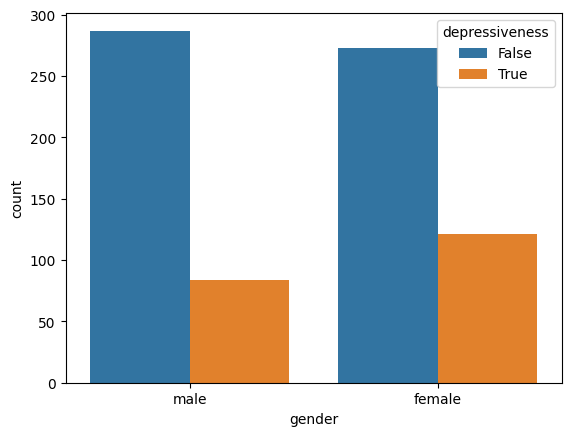

In [17]:
sns.countplot(x='gender', hue='depressiveness', data=df)

Text(0.5, 1.0, 'Depressiveness by WHO BMI')

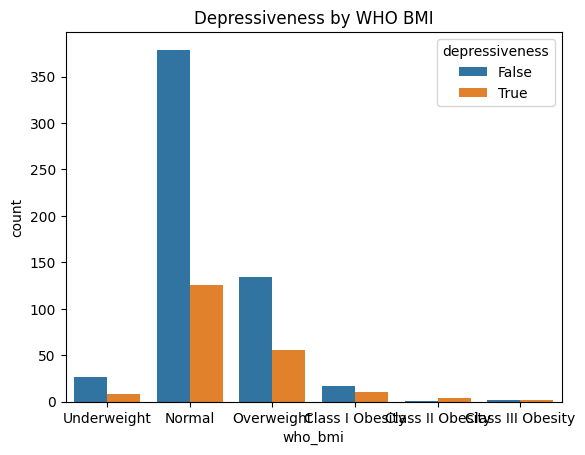

In [18]:
sns.countplot(x='who_bmi', hue='depressiveness', data=df, order=['Underweight', 'Normal', 'Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity']) 
plt.title('Depressiveness by WHO BMI')

Text(0.5, 1.0, 'Depressiveness by WHO BMI (Male)')

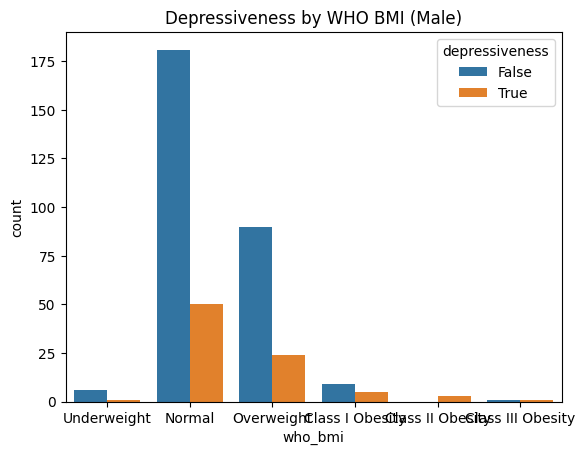

In [19]:
sns.countplot(x='who_bmi', hue='depressiveness', data=df[df['gender'] == 'male'], order=['Underweight', 'Normal', 'Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity'])  # Maintain order if it exists
plt.title('Depressiveness by WHO BMI (Male)')

Text(0.5, 1.0, 'Depressiveness by WHO BMI (Female)')

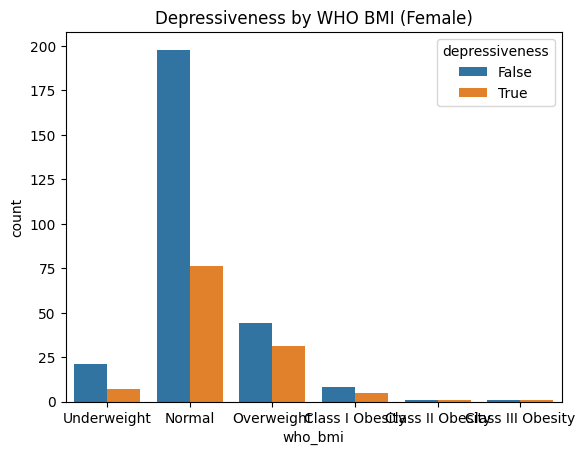

In [20]:
sns.countplot(x='who_bmi', hue='depressiveness', data=df[df['gender'] == 'female'], order=['Underweight', 'Normal', 'Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity'])  # Maintain order if it exists
plt.title('Depressiveness by WHO BMI (Female)')

In [21]:
pd.crosstab(df['who_bmi'], df['depressiveness'])

depressiveness,False,True
who_bmi,,
Class I Obesity,17,10
Class II Obesity,1,4
Class III Obesity,2,2
Normal,379,126
Overweight,134,55
Underweight,27,8


<Axes: xlabel='age', ylabel='count'>

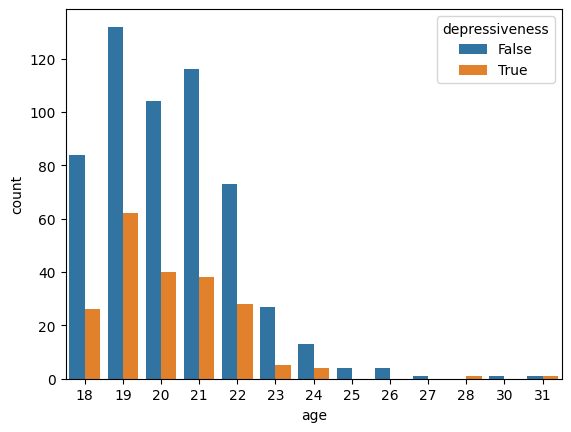

In [22]:
sns.countplot(x='age', hue='depressiveness', data=df, stat='count')

In [23]:
pd.crosstab(df['age'], df['depressiveness'])

depressiveness,False,True
age,,
18,84,26
19,132,62
20,104,40
21,116,38
22,73,28
23,27,5
24,13,4
25,4,0
26,4,0


In [24]:
df[['age', 'depressiveness']].corr()

,age,depressiveness
age,1.000000,-0.037974
depressiveness,-0.037974,1.000000


In [25]:
df[['age', 'anxiousness']].corr()

,age,anxiousness
age,1.000000,-0.071614
anxiousness,-0.071614,1.000000


In [26]:
df[df['depressiveness'] == True].describe()

,age,phq_score,gad_score
count,205.000000,205.000000,205.000000
mean,20.146341,12.834146,11.043902
std,1.722984,3.690449,4.871186
min,18.000000,4.000000,0.000000
25%,19.000000,10.000000,7.000000
50%,20.000000,12.000000,11.000000
75%,21.000000,15.000000,15.000000
max,31.000000,24.000000,21.000000


In [27]:
df[df['depressiveness'] == False].describe()

,age,phq_score,gad_score
count,560.000000,560.000000,560.000000
mean,20.298214,5.092857,5.358929
std,1.790053,2.376529,3.639098
min,18.000000,0.000000,0.000000
25%,19.000000,3.000000,3.000000
50%,20.000000,5.000000,5.000000
75%,21.000000,7.000000,8.000000
max,31.000000,9.000000,18.000000


<Axes: xlabel='age', ylabel='count'>

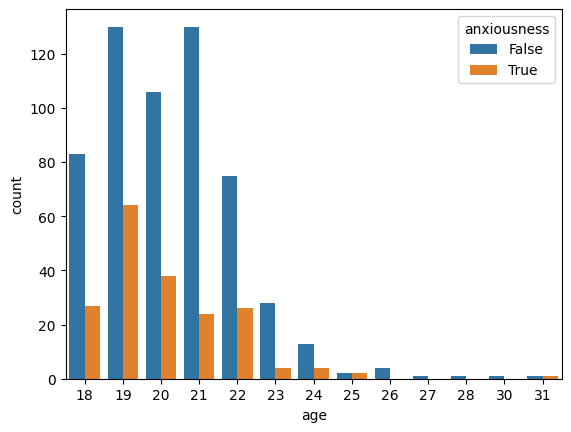

In [28]:
sns.countplot(x='age', hue='anxiousness', data=df)

<Axes: xlabel='age', ylabel='count'>

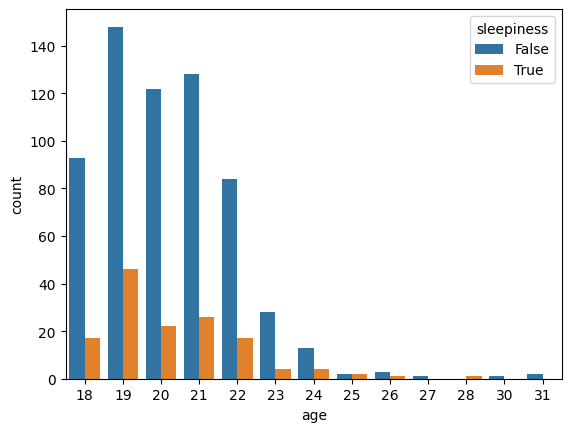

In [29]:
sns.countplot(x='age', hue='sleepiness', data=df)

In [30]:
pd.crosstab(df['depressiveness'], df['depression_diagnosis'])

depression_diagnosis,False,True
depressiveness,,
False,534,26
True,165,40


In [31]:
pd.crosstab(df['depressiveness'], df['depression_treatment'])

depression_treatment,False,True
depressiveness,,
False,533,27
True,175,30


In [32]:
pd.crosstab(df['depressiveness'], df['sleepiness'])

sleepiness,False,True
depressiveness,,
False,487,73
True,138,67


In [33]:
pd.crosstab(df['depressiveness'], df['suicidal'])

suicidal,False,True
depressiveness,,
False,560,0
True,140,65


In [34]:
pd.crosstab(df['anxiousness'], df['anxiety_diagnosis'])

anxiety_diagnosis,False,True
anxiousness,,
False,540,35
True,164,26


In [35]:
pd.crosstab(df['anxiousness'], df['anxiety_treatment'])

anxiety_treatment,False,True
anxiousness,,
False,539,36
True,167,23


In [36]:
pd.crosstab(df['anxiousness'], df['sleepiness'])

sleepiness,False,True
anxiousness,,
False,499,76
True,126,64


In [37]:
pd.crosstab(df['anxiousness'], df['suicidal'])

suicidal,False,True
anxiousness,,
False,551,24
True,149,41


<Axes: xlabel='gender', ylabel='count'>

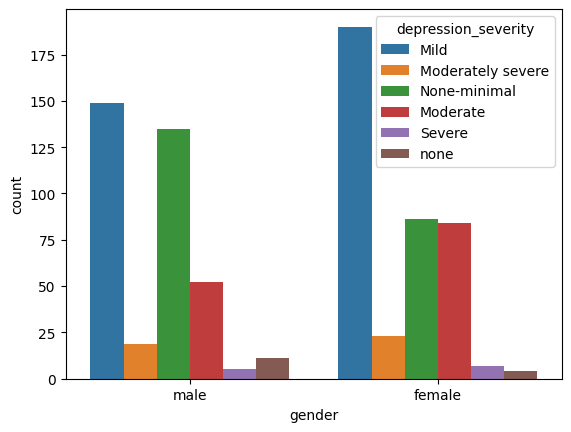

In [38]:
sns.countplot(x='gender', hue='depression_severity', data=df)

<Axes: xlabel='gender', ylabel='count'>

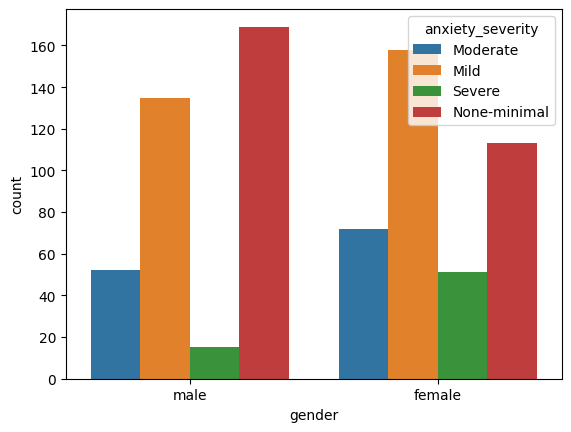

In [39]:
sns.countplot(x='gender', hue='anxiety_severity', data=df)

<Axes: xlabel='age', ylabel='count'>

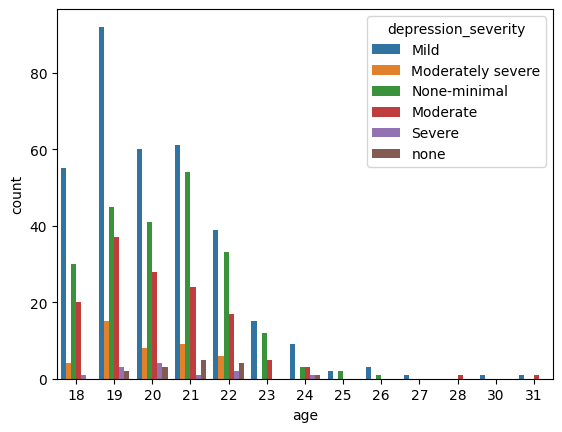

In [40]:
sns.countplot(x='age', hue='depression_severity', data=df)

<Axes: xlabel='age', ylabel='count'>

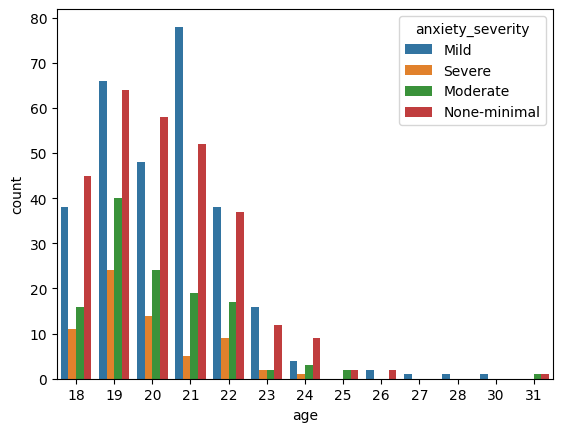

In [41]:
sns.countplot(x='age', hue='anxiety_severity', data=df)

In [42]:
pd.crosstab(df['suicidal'], df['depression_treatment'])

depression_treatment,False,True
suicidal,,
False,655,45
True,53,12


<Axes: >

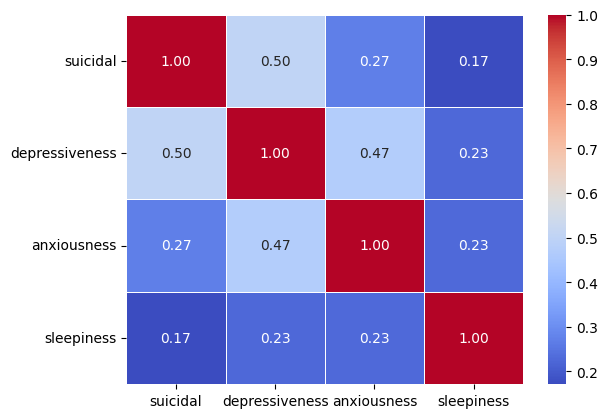

In [43]:
correlation_data = df[['suicidal', 'depressiveness', 'anxiousness', 'sleepiness']] 
correlation_matrix = correlation_data.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [44]:
bool_cols = ['depressiveness', 'suicidal', 'depression_diagnosis', 'depression_treatment', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness']
df[bool_cols] = df[bool_cols].astype(int)

In [45]:
df.head()

,age,gender,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
0,19,male,Class I Obesity,9,Mild,0,0,0,0,11,Moderate,1,0,0,0
1,18,male,Normal,8,Mild,0,0,0,0,5,Mild,0,0,0,1
2,19,male,Overweight,8,Mild,0,0,0,0,6,Mild,0,0,0,0
3,18,female,Normal,19,Moderately severe,1,1,0,0,15,Severe,1,0,0,1
4,18,male,Overweight,6,Mild,0,0,0,0,14,Moderate,1,0,0,0


In [46]:
depression_map = {
    'none': 0,
    'None-minimal': 1,
    'Mild': 2,
    'Moderate': 3,
    'Moderately severe': 4,
    'Severe': 5
}
df['depression_severity'] = df['depression_severity'].map(depression_map)

In [47]:
anxiety_map = {
    'None-minimal': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}
df['anxiety_severity'] = df['anxiety_severity'].map(anxiety_map)

In [48]:
bmi_map = {
    'Underweight':1,
    'Normal':2, 
    'Overweight':3,
    'Class I Obesity':4,
    'Class II Obesity':5, 
    'Class III Obesity':6
}
df['who_bmi'] = df['who_bmi'].map(bmi_map)

In [49]:
df.gender = df.gender.map({"male":1, 'female':0})

In [50]:
df.head()

,age,gender,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
0,19,1,4,9,2,0,0,0,0,11,2,1,0,0,0
1,18,1,2,8,2,0,0,0,0,5,1,0,0,0,1
2,19,1,3,8,2,0,0,0,0,6,1,0,0,0,0
3,18,0,2,19,4,1,1,0,0,15,3,1,0,0,1
4,18,1,3,6,2,0,0,0,0,14,2,1,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 782
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   765 non-null    int64
 1   gender                765 non-null    int64
 2   who_bmi               765 non-null    int64
 3   phq_score             765 non-null    int64
 4   depression_severity   765 non-null    int64
 5   depressiveness        765 non-null    int32
 6   suicidal              765 non-null    int32
 7   depression_diagnosis  765 non-null    int32
 8   depression_treatment  765 non-null    int32
 9   gad_score             765 non-null    int64
 10  anxiety_severity      765 non-null    int64
 11  anxiousness           765 non-null    int32
 12  anxiety_diagnosis     765 non-null    int32
 13  anxiety_treatment     765 non-null    int32
 14  sleepiness            765 non-null    int32
dtypes: int32(8), int64(7)
memory usage: 71.7 KB


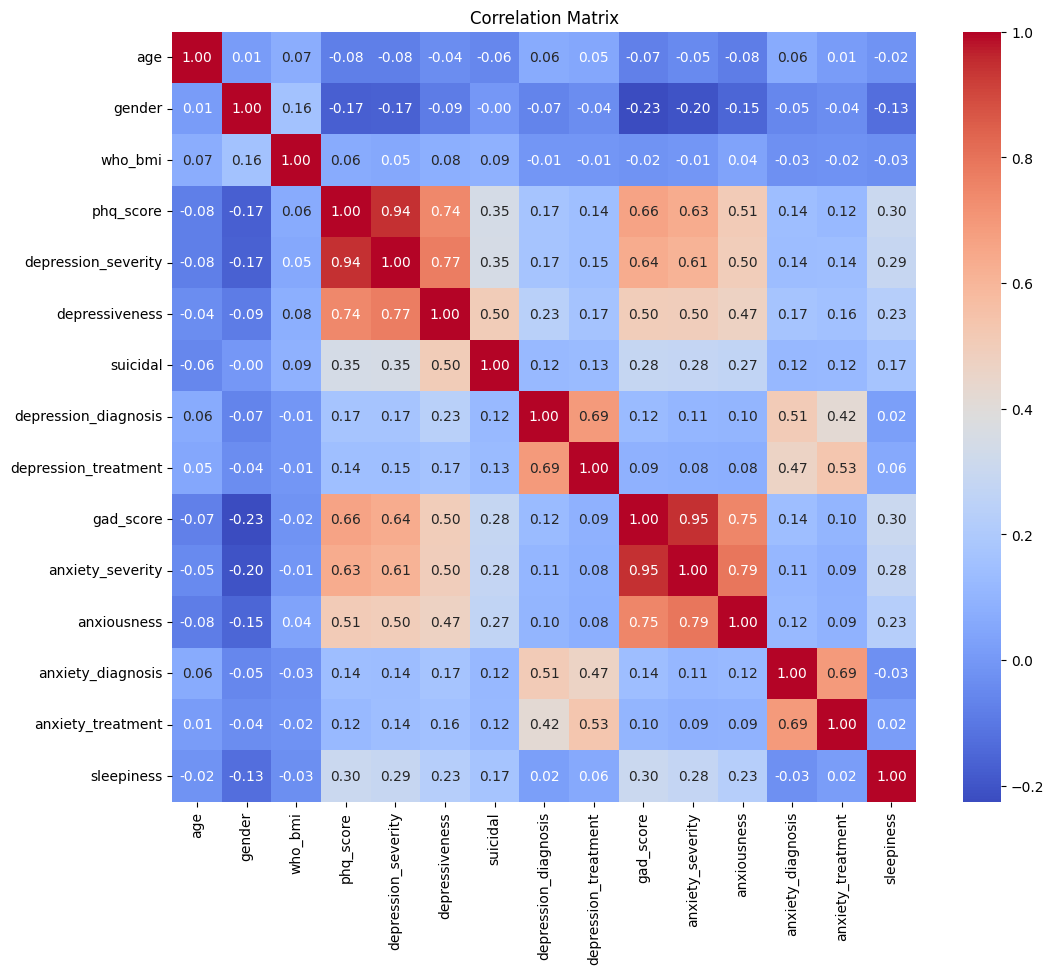

In [52]:
correlation_data = df[df.columns] 
correlation_matrix = correlation_data.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import shap

In [54]:
y = df[['depression_severity', 'anxiety_severity']]
X = df.drop(columns=['depression_severity', 'anxiety_severity'])

label_encoders = {}
for col in y.columns:
    le = LabelEncoder()
    y[col] = le.fit_transform(y[col])
    label_encoders[col] = le  # Save encoder for later decoding

# Feature selection using Random Forest for depression
rf_selector1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector1.fit(X, y['depression_severity'])

# Get top 5 most important features for depression
feature_importances1 = np.argsort(rf_selector1.feature_importances_)[-4:][::-1]
top_features1 = X.columns[feature_importances1]
print("Depression Top 5 Features:", top_features1)


# Feature selection using Random Forest for anxiety
rf_selector2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector2.fit(X, y['anxiety_severity'])

# Get top 5 most important features for anxiety
feature_importances2 = np.argsort(rf_selector2.feature_importances_)[-4:][::-1]
top_features2 = X.columns[feature_importances2]
print("Anxiety Top 5 Features:", top_features2)

# Combine top features from both models
selected_features = list(set(top_features1).union(set(top_features2)))
X_selected = X[selected_features]

print("Selected Features:", selected_features)

Depression Top 5 Features: Index(['phq_score', 'depressiveness', 'gad_score', 'age'], dtype='object')
Anxiety Top 5 Features: Index(['gad_score', 'anxiousness', 'phq_score', 'depressiveness'], dtype='object')
Selected Features: ['phq_score', 'gad_score', 'depressiveness', 'anxiousness', 'age']


In [55]:
# Remove rare classes (less than 2 samples per split)
min_samples = 4  
for col in y.columns:
    value_counts = y[col].value_counts()
    valid_classes = value_counts[value_counts >= min_samples].index
    y = y[y[col].isin(valid_classes)]
    X = X.loc[y.index]  # Ensure X matches y


In [56]:
print(y['depression_severity'].value_counts())
print(y['anxiety_severity'].value_counts())

depression_severity
2    339
1    221
3    136
4     42
0     15
5     12
Name: count, dtype: int64
anxiety_severity
1    293
0    282
2    124
3     66
Name: count, dtype: int64


In [57]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_selected.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_selected.columns)



In [58]:
from sklearn.metrics import make_scorer, f1_score
models = {}
for target in y.columns:
    print(f"Training Random Forest for {target}")
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    rf.fit(X_train, y_train[target])
    
    param_grid = {'n_estimators': [50, 100, 150],
                  'max_depth': [None, 10, 20],
                  'min_samples_split': [2, 5, 10]}
    
    scorer = make_scorer(f1_score, average='macro')
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train[target])
    
    models[target] = grid_search.best_estimator_
    print(f"Best parameters for {target}: {grid_search.best_params_}")

Training Random Forest for depression_severity
Best parameters for depression_severity: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Training Random Forest for anxiety_severity
Best parameters for anxiety_severity: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [59]:
logistic_models = {}
for target in y.columns:
    print(f"Training Logistic Regression for {target}")
    
    lr = LogisticRegression(max_iter=1000, class_weight="balanced")
    lr.fit(X_train, y_train[target])
    logistic_models[target] = lr

Training Logistic Regression for depression_severity
Training Logistic Regression for anxiety_severity


In [60]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for target in y.columns:
    rf_predictions = models[target].predict(X_test)
    lr_predictions = logistic_models[target].predict(X_test)

    print(f"Random Forest Classification Report for {target}:")
    print(classification_report(y_test[target], rf_predictions))
    rf_accuracy = accuracy_score(y_test[target], rf_predictions)
    rf_precision = precision_score(y_test[target], rf_predictions, average='micro')
    rf_recall = recall_score(y_test[target], rf_predictions, average='micro')
    rf_f1 = f1_score(y_test[target], rf_predictions, average='micro')

    # Handle potential errors for ROC-AUC
    try:
        rf_roc_auc = roc_auc_score(y_test[target], models[target].predict_proba(X_test)[:, 1], multi_class='ovr', average='weighted')
    except ValueError:
      rf_roc_auc = "N/A (Only one class present)"

    print(f"Random Forest Additional Metrics for {target}:")
    print(f"Accuracy: {rf_accuracy}")
    print(f"Precision: {rf_precision}")
    print(f"Recall: {rf_recall}")
    print(f"F1-score: {rf_f1}")
    print(f"ROC-AUC: {rf_roc_auc}")


    print(f"Logistic Regression Classification Report for {target}:")
    print(classification_report(y_test[target], lr_predictions))

    # Calculate and print additional metrics for Logistic Regression
    lr_accuracy = accuracy_score(y_test[target], lr_predictions)
    lr_precision = precision_score(y_test[target], lr_predictions, average='micro')
    lr_recall = recall_score(y_test[target], lr_predictions, average='micro')
    lr_f1 = f1_score(y_test[target], lr_predictions, average='micro')

    # Handle potential errors for ROC-AUC
    try:
        lr_roc_auc = roc_auc_score(y_test[target], logistic_models[target].predict_proba(X_test)[:, 1], multi_class='ovr', average='weighted')
    except ValueError:
      lr_roc_auc = "N/A (Only one class present)"

    print(f"Logistic Regression Additional Metrics for {target}:")
    print(f"Accuracy: {lr_accuracy}")
    print(f"Precision: {lr_precision}")
    print(f"Recall: {lr_recall}")
    print(f"F1-score: {lr_f1}")
    print(f"ROC-AUC: {lr_roc_auc}")

Random Forest Classification Report for depression_severity:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.98      0.99        54
           2       0.99      1.00      0.99        71
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1

    accuracy                           0.99       153
   macro avg       1.00      1.00      1.00       153
weighted avg       0.99      0.99      0.99       153

Random Forest Additional Metrics for depression_severity:
Accuracy: 0.9934640522875817
Precision: 0.9934640522875817
Recall: 0.9934640522875817
F1-score: 0.9934640522875817
ROC-AUC: N/A (Only one class present)
Logistic Regression Classification Report for depression_severity:
              precision    recall  f1-score   support

           0       0.14      1.00      0.25         1
         

In [61]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_scores = cross_val_score(models['depression_severity'], X_train, y_train['depression_severity'], cv=cv, scoring='f1_weighted')
print(f"Cross-validation F1-scores (depression_severity): {rf_scores}")
print(f"Mean CV F1-score (depression_severity): {rf_scores.mean()}")
rf_scores = cross_val_score(models['anxiety_severity'], X_train, y_train['anxiety_severity'], cv=cv, scoring='f1_weighted')
print(f"Cross-validation F1-scores (anxiety_severity): {rf_scores}")
print(f"Mean CV F1-score (anxiety_severity): {rf_scores.mean()}")

Cross-validation F1-scores (depression_severity): [1.         0.99168541 0.98303466 1.         1.        ]
Mean CV F1-score (depression_severity): 0.9949440126884059
Cross-validation F1-scores (anxiety_severity): [1. 1. 1. 1. 1.]
Mean CV F1-score (anxiety_severity): 1.0


In [62]:
rf_depression = models['depression_severity']
rf_anxiety = models['anxiety_severity']


In [63]:
from joblib import dump

# Save Random Forest Models
if rf_depression:
    dump(rf_depression, 'rf_depression.joblib')  # Save with specific names
if rf_anxiety:
    dump(rf_anxiety, 'rf_anxiety.joblib')
if scaler:
    dump(scaler, 'scaler.joblib')

In [64]:
import lime
import lime.lime_tabular

class_names_depression = ['None', 'None-minimal', 'Mild', 'Moderate', 'Moderately severe', 'Severe']

class_names_anxiety = ['None-minimal', 'Mild', 'Moderate', 'Severe']

explainer1 = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=X_train.columns.tolist(), 
    class_names=class_names_depression,
    discretize_continuous=True
)

idx = 0  # Change this index to analyze different test samples
sample = X_test.iloc[idx].values.reshape(1, -1)

exp_dep = explainer1.explain_instance(sample[0], rf_depression.predict_proba, num_features=5)

print("🔹 Depression Severity Explanation:")
print(exp_dep.as_list())

exp_dep.show_in_notebook()

🔹 Depression Severity Explanation:
[('-0.75 < phq_score <= -0.08', -0.2762229873115318), ('depressiveness <= -0.64', 0.15848685088245215), ('gad_score > 0.60', -0.03040740668810518), ('age <= -0.72', -0.019191892802294372), ('-0.60 < anxiousness <= 1.67', -0.01489622866266044)]


In [65]:
explainer2 = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=X_train.columns.tolist(), 
    class_names=class_names_anxiety,
    discretize_continuous=True
)

idx = 2
sample = X_test.iloc[idx].values.reshape(1, -1)
exp_dep = explainer2.explain_instance(sample[0], rf_anxiety.predict_proba, num_features=5)
print("🔹 Anxiety Severity Explanation:")
print(exp_dep.as_list())

exp_dep.show_in_notebook()

🔹 Anxiety Severity Explanation:
[('gad_score <= -0.64', -0.665122651995185), ('anxiousness <= -0.60', 0.40710155890650823), ('-0.08 < phq_score <= 0.58', 0.01286197739409975), ('depressiveness <= -0.64', 0.008191914057049124), ('age > 0.44', 0.0006008312826579985)]
